### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [75]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
import IPython.display as display
import matplotlib.image as mpimg

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [76]:
data = pd.read_csv('data/coupons.csv')

In [77]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [78]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [79]:
# First drop the column car because it seems to have no strong relation with our dataset
df = data
df = df.drop('car', axis = 1)


In [80]:
# I tried to replace the slice of the dataframe on the bases of the highest values against each age
#but it did not work!
df.loc[df['age'] == '50plus', 'age'] = df.loc[df['age'] == '50plus', 'age'].fillna('never')
df.loc[df['age'] == '21', 'age'] = df.loc[df['age'] == '21', 'age'].fillna('never')
df.loc[df['age'] == 'below21', 'age'] = df.loc[df['age'] == 'below21', 'age'].fillna('never')
df.loc[df['age'] == '26', 'age'] = df.loc[df['age'] == '26', 'age'].fillna('1~3')
df.loc[df['age'] == '36', 'age'] = df.loc[df['age'] == '36', 'age'].fillna('less1')
df.loc[df['age'] == '41', 'age'] = df.loc[df['age'] == '41', 'age'].fillna('less1')


In [81]:
# So I filled all the values with 'never'.
df['Bar'] = df['Bar'].fillna('never')
df['Bar'].isnull().sum()

0

<Axes: xlabel='count', ylabel='CoffeeHouse'>

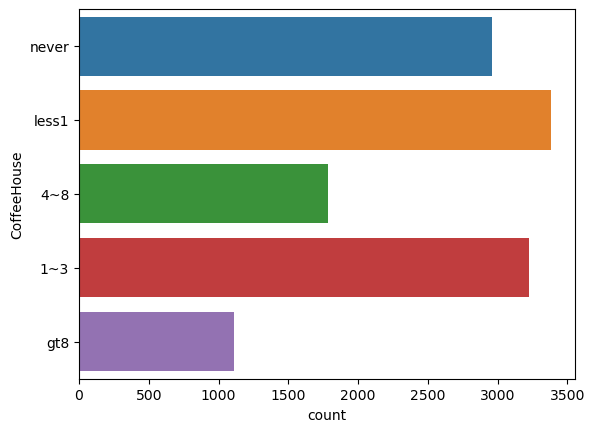

In [82]:
# The most count of the CoffeeHouse coupon is less1 so I used that value to fill the missing cells.
sns.countplot(data, y='CoffeeHouse')

In [83]:
df['CoffeeHouse'] = df['CoffeeHouse'].fillna('less1')
df['CoffeeHouse'].isnull().sum()

0

<Axes: xlabel='count', ylabel='CarryAway'>

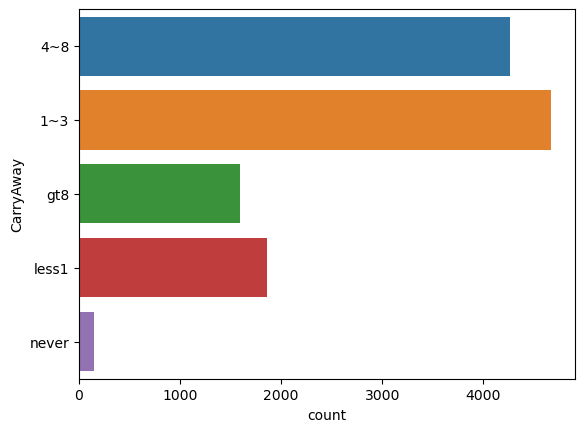

In [84]:
# # The most count of the CarryAway coupon is 1~3 so I used that value to fill the missing cells.
sns.countplot(data, y='CarryAway')

In [85]:
df['CarryAway'] = df['CarryAway'].fillna('1~3')
df['CarryAway'].isnull().sum()

0

<Axes: xlabel='count', ylabel='RestaurantLessThan20'>

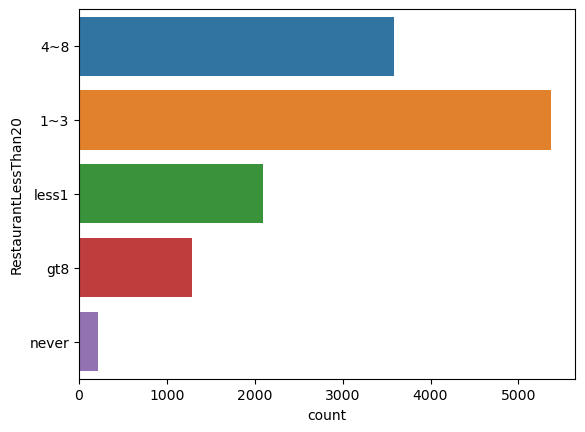

In [86]:
# The most count of the RestaurantLessThan20 coupon is 1~3 so I used that value to fill the missing cells.
sns.countplot(data, y='RestaurantLessThan20')

In [87]:
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].fillna('1~3')
df['RestaurantLessThan20'].isnull().sum()

0

<Axes: xlabel='count', ylabel='Restaurant20To50'>

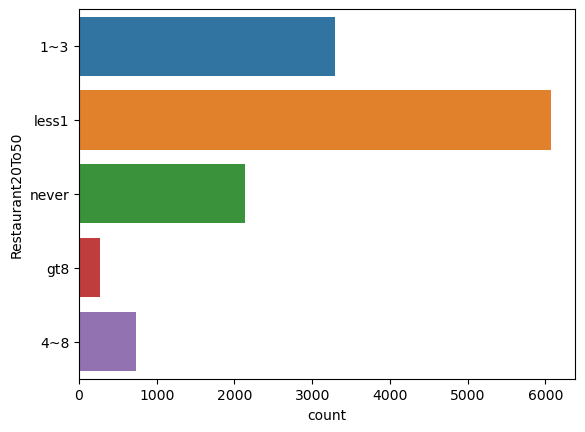

In [88]:
# The most count of the Restaurant20to50 coupon is less1 so I used that value to fill the missing cells.
sns.countplot(data, y='Restaurant20To50')

In [89]:
df['Restaurant20To50'] = df['Restaurant20To50'].fillna('less1')
df['Restaurant20To50'].isnull().sum()

0

In [90]:
# Now find the count of null values to make sure.
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [91]:

# Replace the string values with integer values
df = df.replace('never', 0)
df = df.replace('less1', 0)
df = df.replace('1~3', 2.5)
df = df.replace('4~8', 6)
df = df.replace('gt8', 9)
# Change the column Age to the appropriate values
df = df.replace('50plus', '51')
df = df.replace('below21', '20')

# Change Income column to integral mean values
df = df.replace("$100000 or More", "$100000 - $200000")
df = df.replace("Less than $12500", "$9000 - $12500")



In [92]:
# Capitalize the first letter of each column
df.columns = df.columns.str.capitalize()

In [93]:
# Change the temprature values intto the integers values
df['Age'] = pd.to_numeric(df['Age'])
df['Income'] = df['Income'].apply(lambda x: np.round_(np.mean([int((x.split('-')[0]).split("$")[1]), int((x.split('-')[1]).split('$')[1])])))


In [94]:
# Column name Passanger is misspelled so correct it.
df = df.rename(columns = {'Passanger' : 'Passenger'})

4. What proportion of the total observations chose to accept the coupon? 



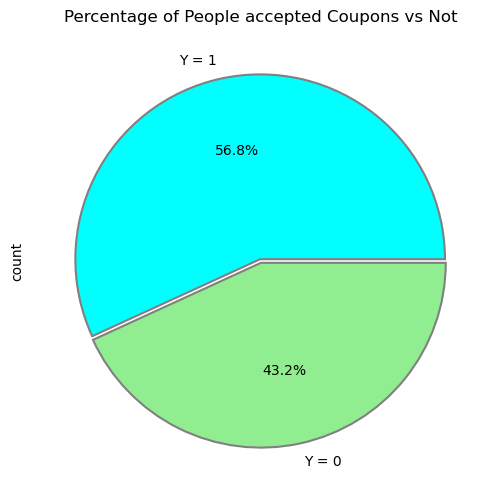

In [95]:
# Draw a pie chart to visualize the percentage of an acceptance.
labels = 'Y = 1', 'Y = 0'
plt.figure(figsize=(7,6))
explode = (0.01,0.01)
wedgeprops = {
    'edgecolor': 'gray',  # Border color
    'linewidth': 1.5      # Border width
}
df['Y'].value_counts().plot.pie(labels=labels,autopct='%1.1f%%', colors = ['cyan', 'lightgreen'], wedgeprops=wedgeprops, explode=explode)
plt.title("Percentage of People accepted Coupons vs Not")
plt.show()
#Findings: 56.8% of the people chose to accept the coupon

5. Use a bar plot to visualize the `coupon` column.

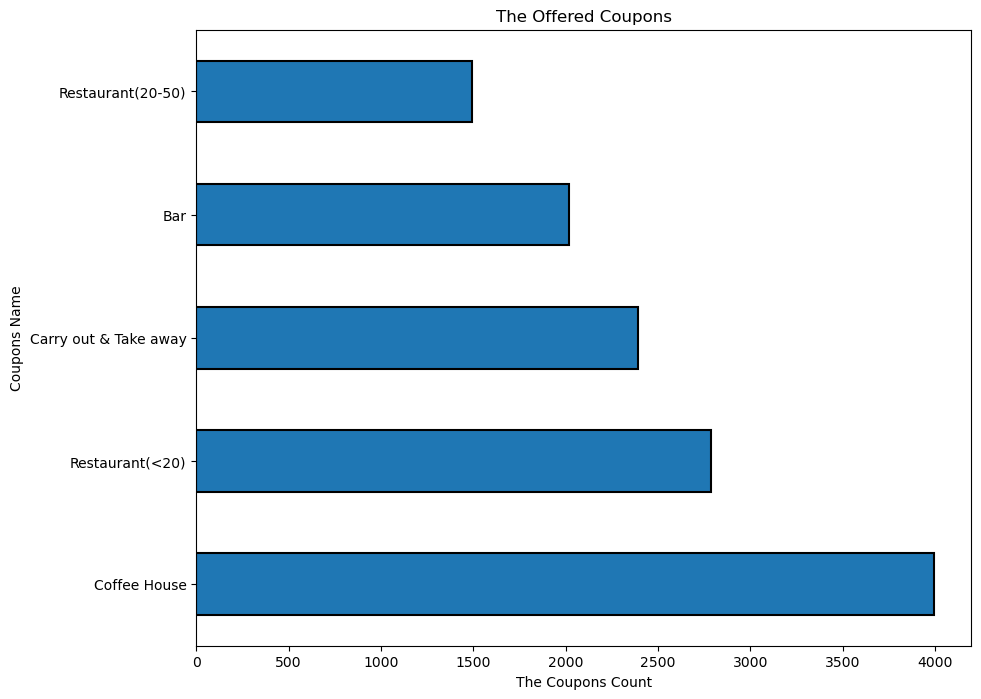

In [96]:
#Bar plot to visualize the column
plt.figure(figsize=(10,8))
df['Coupon'].value_counts().plot.barh(ylabel = "Coupons Name", xlabel= "The Coupons Count", edgecolor='black', linewidth=1.5)
plt.title('The Offered Coupons')

plt.show()
#Findings: The most offered coupon is the Coffehouse Coupon.

6. Use a histogram to visualize the temperature column.

In [97]:
# An histogram to visualize the temprature vs Coupon's acceptance.
px.histogram(df, x='Temperature', color='Y', title="Temprature Vs Coupon'sAcceptance")
# Findings: The high number of coupon's offering is associated with high temprature.
# The lowest rejection rate is observed with the temprature of 80F which is .40 as comapre to
#.46 for 60F and .47 for 30F.

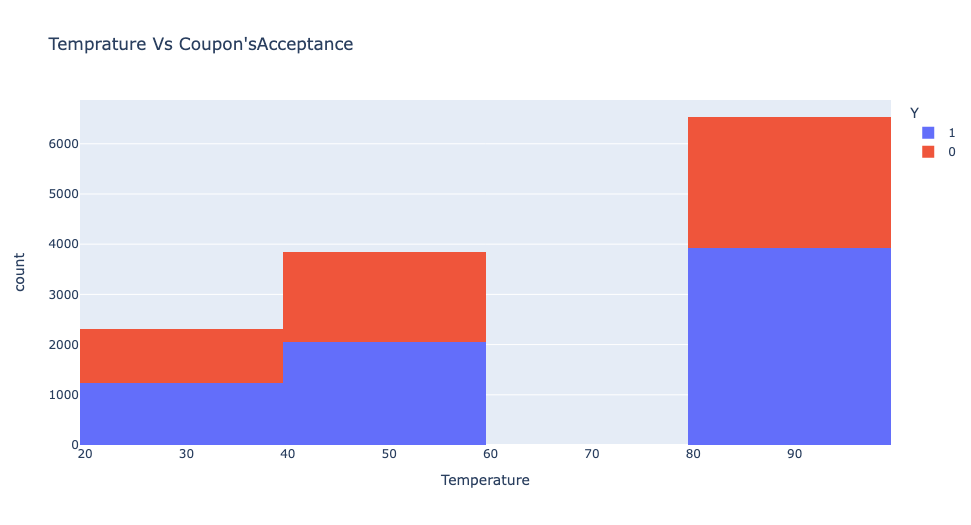

In [74]:
image_path = 'Images/plotly_1.png'
image = Image.open(image_path)
display.display(image)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: title={'center': "Temprature Vs Coupon'sAcceptance"}, xlabel='Temperature', ylabel='Count'>

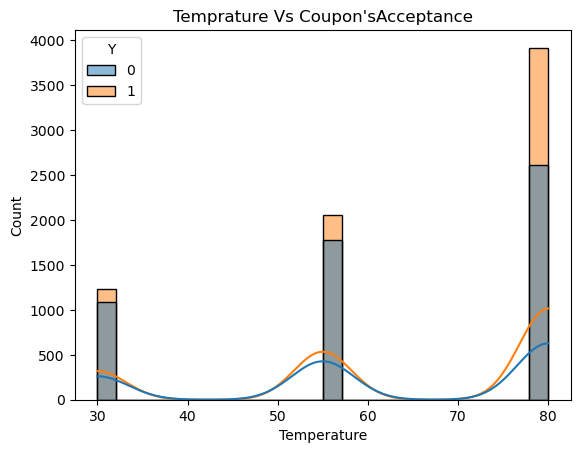

In [33]:
#Another way to visualize the Temprature and its effect on acceptance Coupons.
plt.title("Temprature Vs Coupon'sAcceptance")
sns.histplot(df, x='Temperature', hue='Y', kde=True)
#Findings : The probability of acceptance is high when the temprature is 80F while it is almost
#50% when the temprature dropped to 30F.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [34]:
df_bar_coupons = df.query('Coupon == "Bar"')
df_bar_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Destination           2017 non-null   object 
 1   Passenger             2017 non-null   object 
 2   Weather               2017 non-null   object 
 3   Temperature           2017 non-null   int64  
 4   Time                  2017 non-null   object 
 5   Coupon                2017 non-null   object 
 6   Expiration            2017 non-null   object 
 7   Gender                2017 non-null   object 
 8   Age                   2017 non-null   int64  
 9   Maritalstatus         2017 non-null   object 
 10  Has_children          2017 non-null   int64  
 11  Education             2017 non-null   object 
 12  Occupation            2017 non-null   object 
 13  Income                2017 non-null   float64
 14  Bar                   2017 non-null   float64
 15  Coffeehouse           201

In [35]:
df_bar_coupons.head()

,Destination,Passenger,Weather,Temperature,Time,Coupon,Expiration,Gender,Age,Maritalstatus,...,Coffeehouse,Carryaway,Restaurantlessthan20,Restaurant20to50,Tocoupon_geq5min,Tocoupon_geq15min,Tocoupon_geq25min,Direction_same,Direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,0.0,2.5,6.0,2.5,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,0.0,2.5,6.0,2.5,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,0.0,2.5,6.0,2.5,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,0.0,6.0,6.0,0.0,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,0.0,6.0,6.0,0.0,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


<Axes: title={'center': 'The Proportion of BarCoupon Acceptance'}, xlabel='BarCoupn', ylabel='Proportion'>

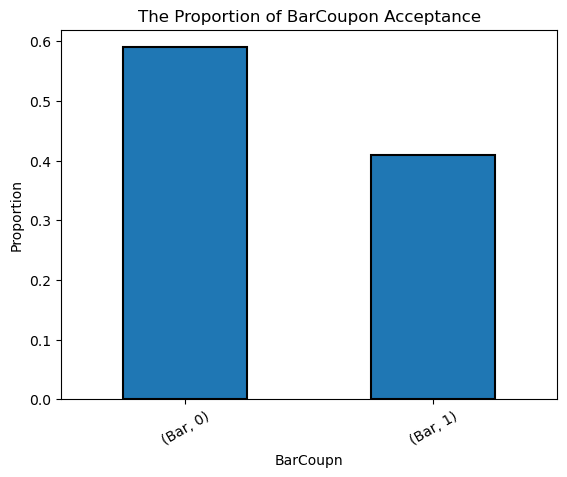

In [36]:
# Bar plot to see the proportion of acceptance vs Rewjection 
df_bar_coupons.groupby('Coupon')['Y'].value_counts(normalize=True).plot.bar(rot=30,title="The Proportion of BarCoupon Acceptance", xlabel='BarCoupn', ylabel='Proportion', edgecolor='black', linewidth=1.5)
# Findings: It is evident from the plot that 59% of the people rejected the BarCoupon.

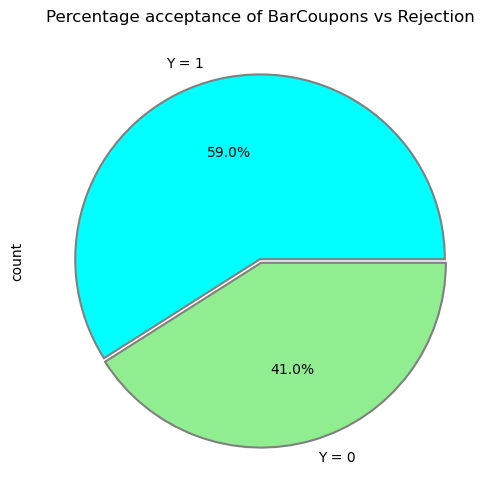

In [37]:
# Another plot to visualize the above proportions.
labels = 'Y = 1', 'Y = 0'
plt.figure(figsize=(7,6))
explode = (0.01,0.01)
wedgeprops = {
    'edgecolor': 'gray',  # Border color
    'linewidth': 1.5      # Border width
}
df_bar_coupons['Y'].value_counts().plot.pie(labels=labels,autopct='%1.1f%%', colors = ['cyan', 'lightgreen'], wedgeprops=wedgeprops, explode=explode)
plt.title("Percentage acceptance of BarCoupons vs Rejection")
plt.show()
#Findings: 59% of the coupons were accepted while 41% rejected.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


array([<Axes: >], dtype=object)

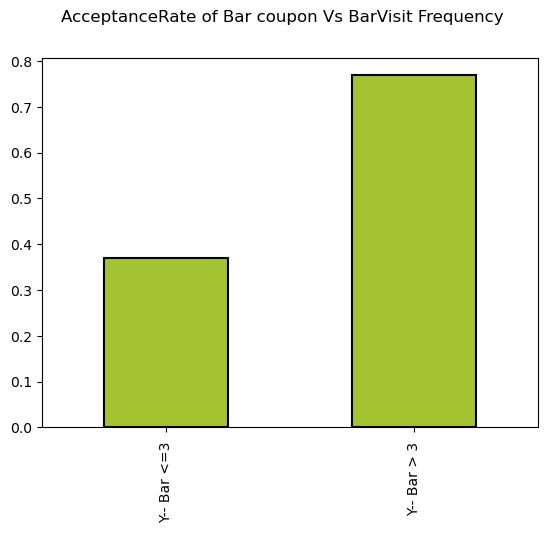

In [38]:
summation = None
a = None
b = None
c = None
a = (df_bar_coupons.query('(Bar <= 3) & (Y == 1)')[['Y']].count())/(df_bar_coupons.query('(Bar <= 3)')[['Y']].count())
b = (df_bar_coupons.query('(Bar > 3) & (Y == 1)')[[ 'Y']].count())/(df_bar_coupons.query('(Bar > 3)')[['Y']].count())
a = a.add_suffix('-- Bar <=3 ')
b = b.add_suffix('-- Bar > 3 ')
c = pd.concat([a, b])
c.plot.bar(subplots=True, title="AcceptanceRate of Bar coupon Vs BarVisit Frequency", color='#a4c330', edgecolor='black', linewidth=1.5)


#Findings: Acceptance rate is high for the people who visit a bar more than 3 times a month.
# Acceptance Rate is 0.37 for the people who visit a bar 3 or fewer times a month.
#Acceptance Rate is 0.77 for the people who visit a bar more than 3 times a month

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



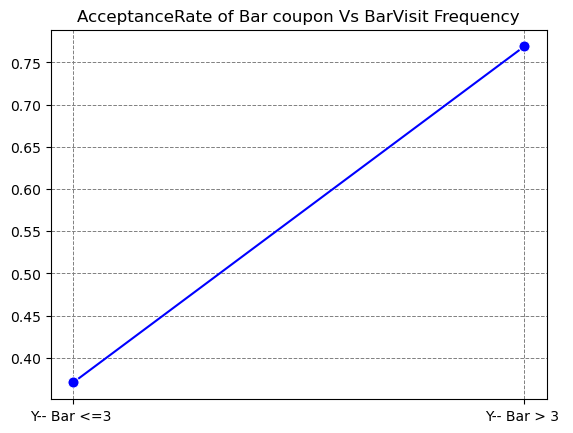

In [39]:
#Another way is to plot the above statistics.
plt.title('AcceptanceRate of Bar coupon Vs BarVisit Frequency')
sns.lineplot(c, marker='o', markersize=8, color='blue', linestyle='-')
plt.grid(which='both',          # Apply to both major and minor grid lines
         axis='both',           # Apply to both x and y axes
         color='gray',          # Grid line color
         linestyle='--',       # Grid line style
         linewidth=0.7) 
#The inclination of the line is the result of matching the both rates.
# The Acceptance rate is 0.77 for persons visit a bar 3 or more times vs 0.37 for people visit a bar fewer times.

In [40]:
# Plotly graph to visulalize the acceptance rate vs visit a bar per month.
fig = px.bar(c)
fig.update_layout(
    title='AcceptanceRate of Bar coupon Vs BarVisit Frequency',  
    xaxis=dict(title='Bar Visit Frequency'),  
    yaxis=dict(title='Acceptance Rate')       
)
fig.show()

#Findings: Acceptance rate is high for the people who visit a bar more than 3 times a month.
# Acceptance Rate is 0.37 for the people who visit a bar 3 or fewer times a month.
#Acceptance Rate is 0.77 for the people who visit a bar more than 3 times a month

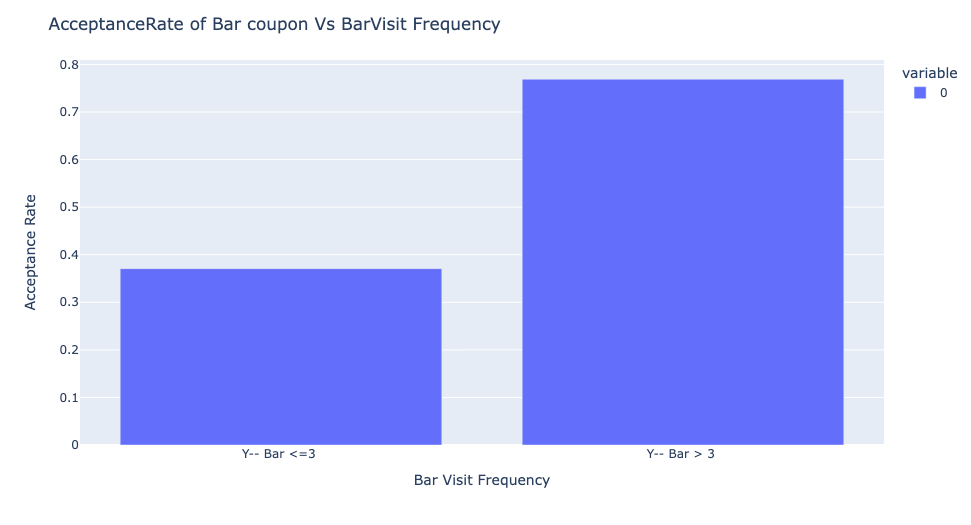

In [41]:
image_path = 'Images/plotly_2.png'
image = Image.open(image_path)
display.display(image)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


array([<Axes: >], dtype=object)

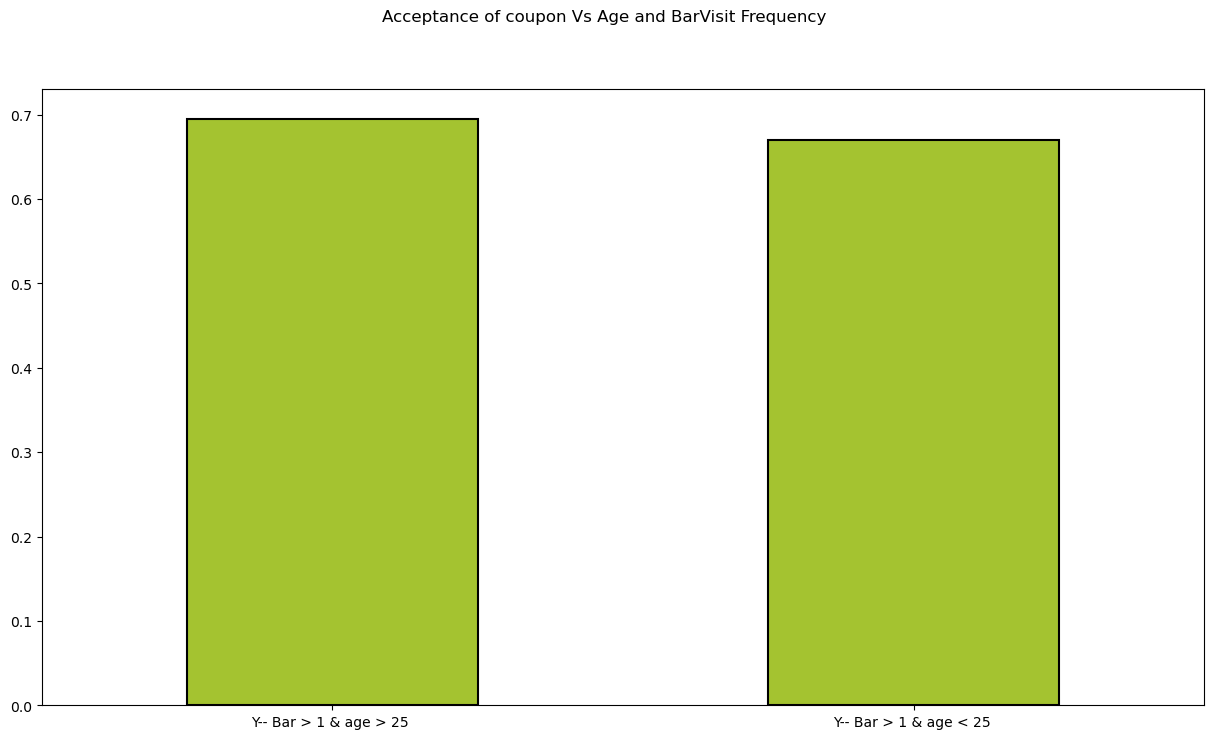

In [42]:
# Bar plot to visualize the acceptance rate of Bar Coupons Vs Age and frequency of visiting to Bar per month.
summation = None
a = None
b = None
c = None

a = (df_bar_coupons.query('(Bar > 1) & (Age > 25) & (Y == 1)')[['Y']].count())/(df_bar_coupons.query('(Bar > 1) & (Age > 25)')[['Y']].count())
b = (df_bar_coupons.query('(Bar > 1) & (Age < 25) & (Y == 1)')[[ 'Y']].count())/(df_bar_coupons.query('(Bar > 1) & (Age < 25)')[['Y']].count())
a = a.add_suffix('-- Bar > 1 & age > 25 ')
b = b.add_suffix('-- Bar > 1 & age < 25 ')
c = pd.concat([a, b])

plt.figure(figsize=(15,8))
c .plot.bar(subplots=True, title="Acceptance of coupon Vs Age and BarVisit Frequency", color='#a4c330', rot=360, edgecolor='black', linewidth=1.5)

#Findings: The acceptance rate is almost same with a mild difference.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



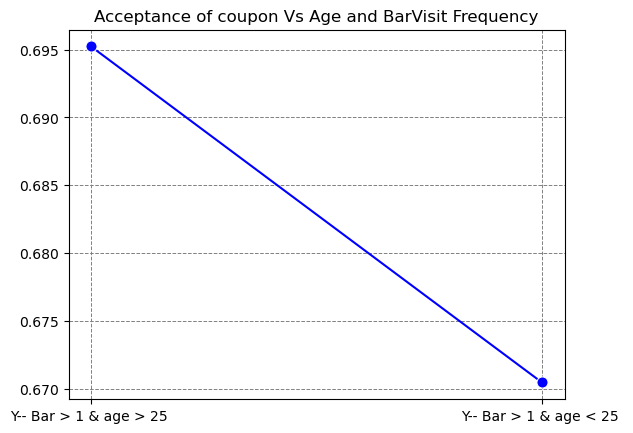

In [43]:
# line plot in sns to visualize the acceptance rate of Bar Coupons Vs Age and frequency of visiting to Bar per month.
# line plot to visualize the acceptance rate of Bar Coupons Vs Age and frequency of visiting to Bar per month.
summation = None
a = None
b = None
c = None

a = (df_bar_coupons.query('(Bar > 1) & (Age > 25) & (Y == 1)')[['Y']].count())/(df_bar_coupons.query('(Bar > 1) & (Age > 25)')[['Y']].count())
b = (df_bar_coupons.query('(Bar > 1) & (Age < 25) & (Y == 1)')[[ 'Y']].count())/(df_bar_coupons.query('(Bar > 1) & (Age < 25)')[['Y']].count())
a = a.add_suffix('-- Bar > 1 & age > 25 ')
b = b.add_suffix('-- Bar > 1 & age < 25 ')
c = pd.concat([a, b])
plt.title('Acceptance of coupon Vs Age and BarVisit Frequency')
sns.lineplot(c, marker='o', markersize=8, color='blue', linestyle='-')
plt.grid(which='both',          # Apply to both major and minor grid lines
         axis='both',           # Apply to both x and y axes
         color='gray',          # Grid line color
         linestyle='--',       # Grid line style
         linewidth=0.7) 
plt.show()
# Finidings : Acceptance rate (0.695) is a little high for people who are older than 25 years of age
# and visit bar more frequently per month vs the people who are younger than 25 years of age (0.670).


In [44]:
# Bar plot to visualize the acceptance rate of Bar Coupons Vs Age and frequency of visiting to Bar per month.
summation = None
a = None
b = None
c = None

a = (df_bar_coupons.query('(Bar > 1) & (Age > 25) & (Y == 1)')[['Y']].count())/(df_bar_coupons.query('(Bar > 1) & (Age > 25)')[['Y']].count())
b = (df_bar_coupons.query('(Bar > 1) & (Age < 25) & (Y == 1)')[[ 'Y']].count())/(df_bar_coupons.query('(Bar > 1) & (Age < 25)')[['Y']].count())
a = a.add_suffix('-- Bar > 1 & age > 25 ')
b = b.add_suffix('-- Bar > 1 & age < 25 ')
c = pd.concat([a, b])
fig = px.bar(c)
fig.update_layout(
    title='Acceptance of Bar coupon Vs Age and BarVisit Frequency',  
    xaxis=dict(title='Acceptance Vs Bar Visit Frequency and Age'),  
    yaxis=dict(title='Acceptance Rate')       
)
fig.show()

# Finidings : Acceptance rate (0.695) is a little high for people who are older than 25 years of age
# and visit bar more frequently per month vs the people who are younger than 25 years of age (0.670).


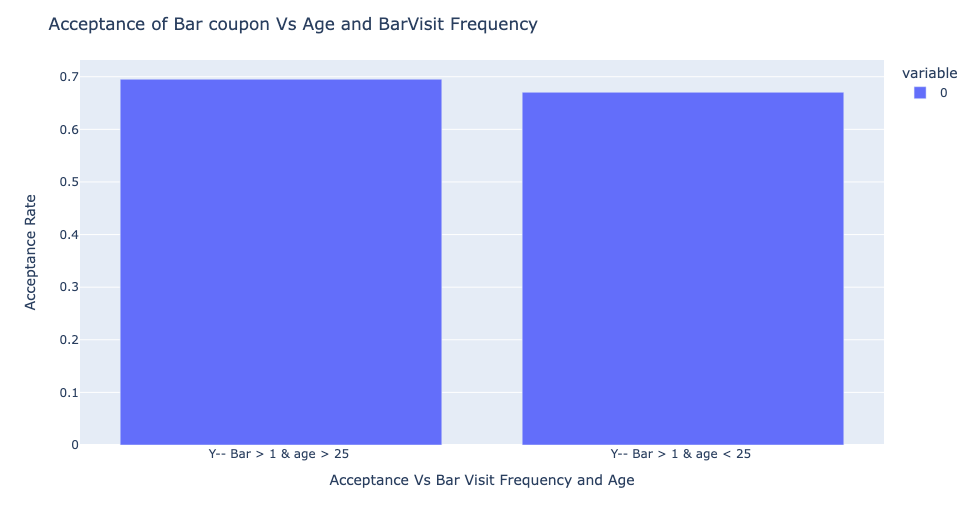

In [45]:
image_path = 'Images/plotly_3.png'
image = Image.open(image_path)
display.display(image)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


array([<Axes: >], dtype=object)

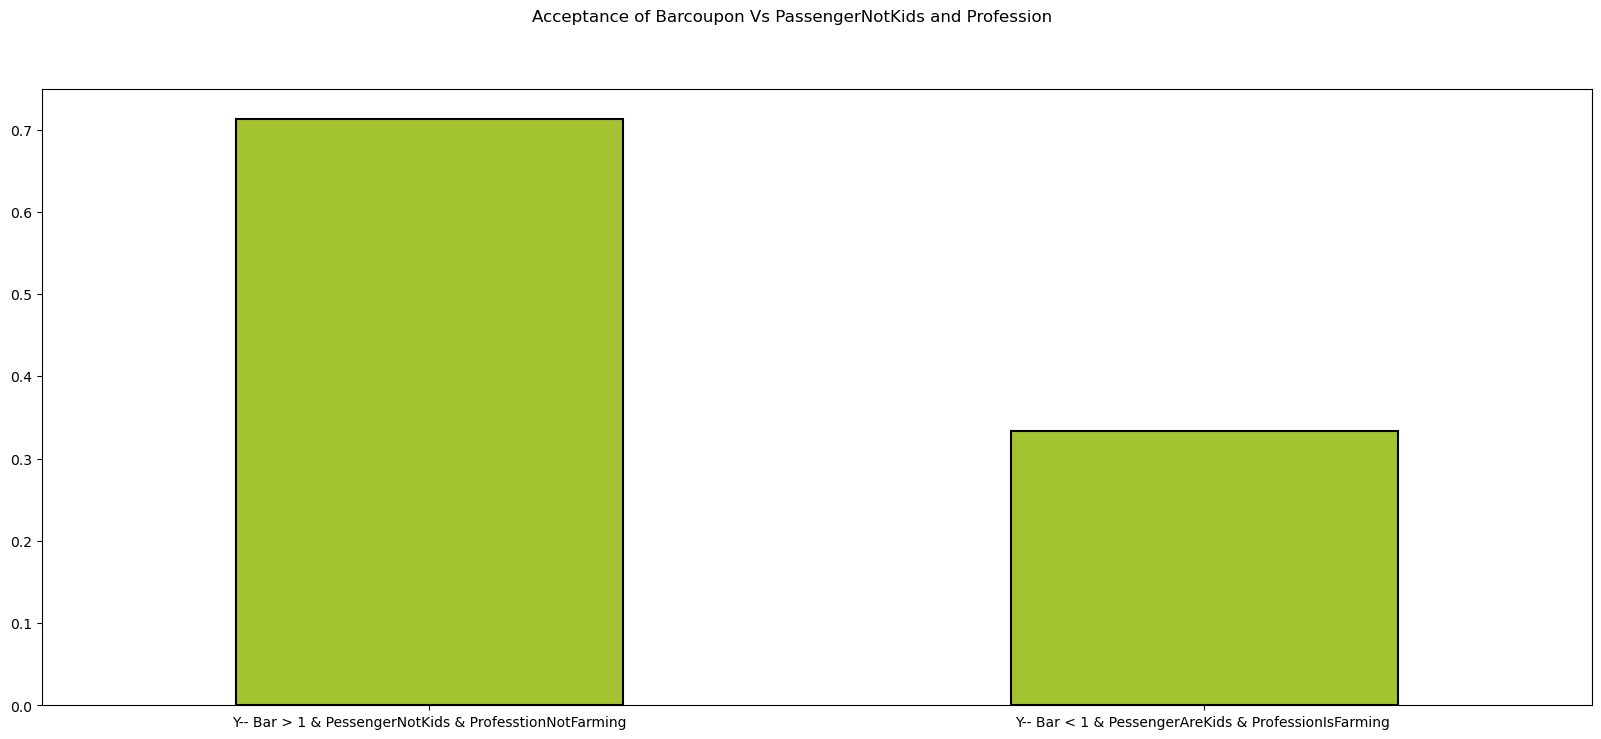

In [46]:
# Intialize all reusable parameters to None
summation = None
a = None
b = None

# Apply the query to extract the data base
a = df_bar_coupons.query('(Bar > 1) & (Passenger != "Kid(s)") & (Occupation != "Farming Fishing & Forestry") & (Y == 1)')[['Y']].count()
a = a/df_bar_coupons.query('(Bar > 1) & (Passenger != "Kid(s)") & (Occupation != "Farming Fishing & Forestry")')[['Y']].count()

b = df_bar_coupons.query('(Bar <= 1) & (Passenger == "Kid(s)") & (Occupation == "Farming Fishing & Forestry") & (Y == 1)')[['Y']].count()
b = b/df_bar_coupons.query('(Bar <= 1) & (Passenger == "Kid(s)") & (Occupation == "Farming Fishing & Forestry")')[['Y']].count()

a = a.add_suffix('-- Bar > 1 & PessengerNotKids & ProfesstionNotFarming')
b = b.add_suffix('-- Bar < 1 & PessengerAreKids & ProfessionIsFarming ')

c = pd.concat([a, b])
plt.figure(figsize=(20,8))
c .plot.bar(subplots=True, title="Acceptance of Barcoupon Vs PassengerNotKids and Profession", color='#a4c330', rot=360, edgecolor='black', linewidth=1.5)
# Findings: The rate of acceptance is clearly high (0.71 )in the people who does not accompany kids 
# and by profession they do other than FarmingFishingForestry..(0.33)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



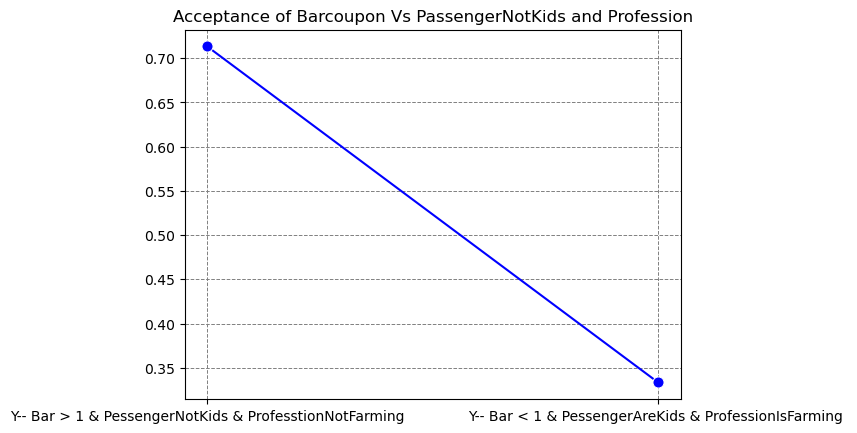

In [47]:
#Sns plot to visualize the above criteria.
plt.title('Acceptance of Barcoupon Vs PassengerNotKids and Profession')
sns.lineplot(c, marker='o', markersize=8, color='blue', linestyle='-')
plt.grid(which='both',          # Apply to both major and minor grid lines
         axis='both',           # Apply to both x and y axes
         color='gray',          # Grid line color
         linestyle='--',       # Grid line style
         linewidth=0.7) 

# Findings: The rate of acceptance is clearly high in the people who does not accompany kids 
# and by profession they do other than FarmingFishingForestry..

In [48]:
# Plotly visualization to visualize the above criteria.
fig = px.bar(c)
fig.update_layout(
    title='Acceptance of Barcoupon Vs PassengerNotKids and Profession',   
    yaxis=dict(title='Acceptance Rate')       
)
fig.show()

# Findings: The rate of acceptance is clearly high (0.71 )in the people who does not accompany kids 
# and by profession they do other than FarmingFishingForestry..(0.33)

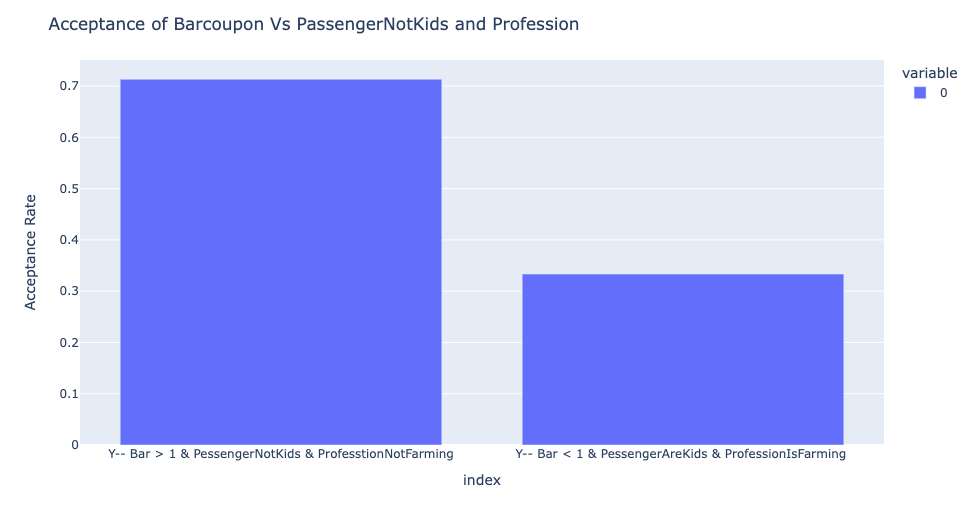

In [49]:
image_path = 'Images/plotly_4.png'
image = Image.open(image_path)
display.display(image)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



array([<Axes: >], dtype=object)

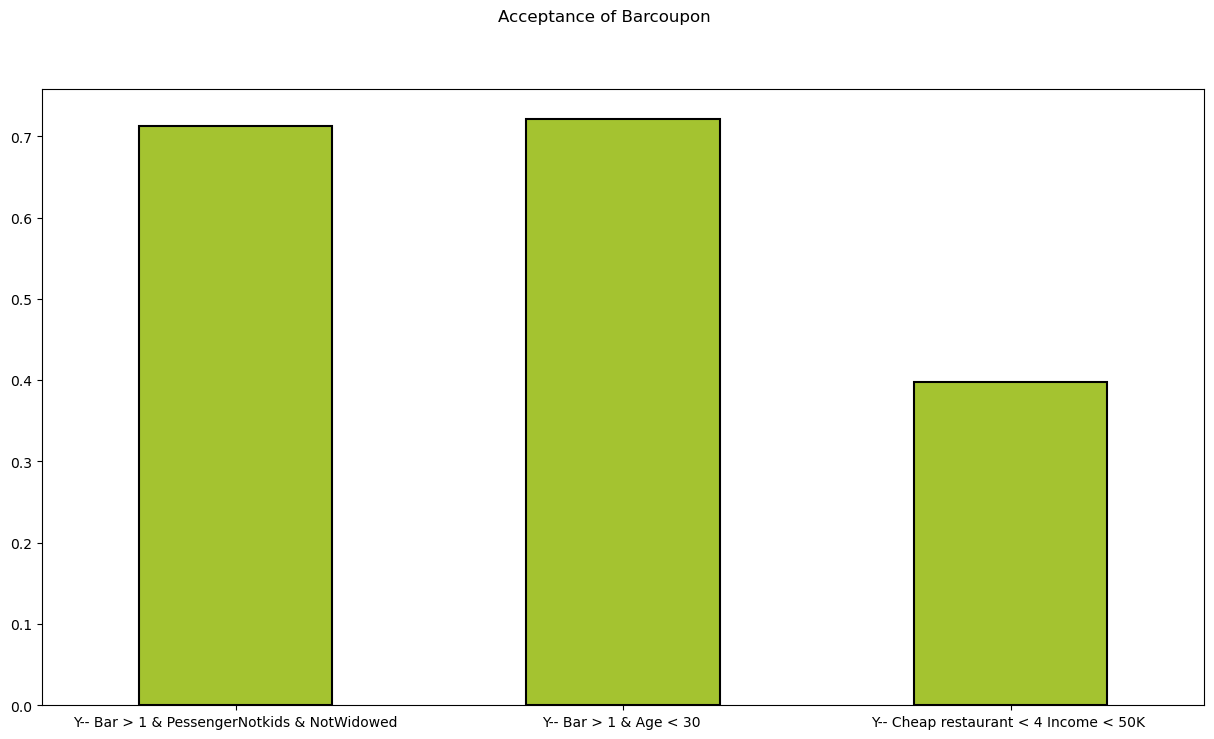

In [50]:
# Intialize all reusable parameters to None
summation = None
a = None
b = None

a = df_bar_coupons.query('(Bar > 1) & (Passenger != "Kid(s)") & (Maritalstatus != "Widowed") & (Y == 1)')[['Y']].count()
a = a/df_bar_coupons.query('(Bar > 1) & (Passenger != "Kid(s)") & (Maritalstatus != "Widowed")')[['Y']].count()
a

b = df_bar_coupons.query('(Bar > 1) & (Age < 30) & (Y == 1)')[['Y']].count()
b = b/df_bar_coupons.query('(Bar > 1) & (Age < 30)')[['Y']].count()
b

c = df_bar_coupons.query('(Restaurantlessthan20 < 4) & (Income < 50000) & (Y == 1)')[['Y']].count()
c = c/df_bar_coupons.query('(Restaurantlessthan20 < 4) & (Income < 50000)')[['Y']].count()
c

a = a.add_suffix('-- Bar > 1 & PessengerNotkids & NotWidowed')
b = b.add_suffix('-- Bar > 1 & Age < 30 ')
c = c.add_suffix('-- Cheap restaurant < 4 Income < 50K ')

d = pd.concat([a, b])
e = pd.concat([d, c])
plt.figure(figsize=(15,8))
e.plot.bar(subplots=True, title="Acceptance of Barcoupon", color='#a4c330', rot=360, edgecolor='black', linewidth=1.5)

#Findings: The rate of acceptance is higher who are less than 30 years (.721), and the people with Income
#less than 50k has the acceptance rate lowest(.40). While the people under age 30 and visit the bar more 
# than once a month has a rate of (.713) which almost matches the first category.

In [51]:
# Plotyl bar plot to visualize the acceptance rate.
fig = px.bar(e)
fig.update_layout(
    title='Acceptance of Barcoupon',   
    yaxis=dict(title='Acceptance Rate')       
)
fig.show()
#Findings: The rate of acceptance is higher who are less than 30 years (.721), and the people with Income
#less than 50k has the acceptance rate lowest(.40). While the people under age 30 and visit the bar more 
# than once a month has a rate of (.713) which almost matches the first category.

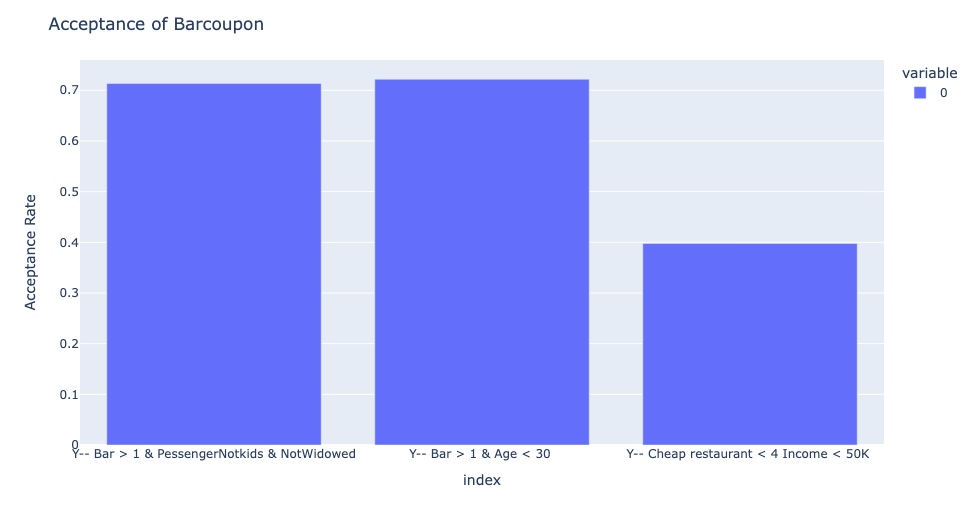

In [52]:
image_path = 'Images/plotly_5.png'
image = Image.open(image_path)
display.display(image)

In [53]:
# Plotly line plot to visualize the acceptance rate with three different criterias.
fig = px.line(e)
fig.update_layout(
    title='Acceptance of Barcoupon',   
    yaxis=dict(title='Acceptance Rate')       
)
fig.show()
#Findings: The rate of acceptance is higher who are less than 30 years (.721), and the people with Income
#less than 50k has the acceptance rate lowest(.40). While the people under age 30 and visit the bar more 
# than once a month has a rate of (.713) which almost matches the first category.

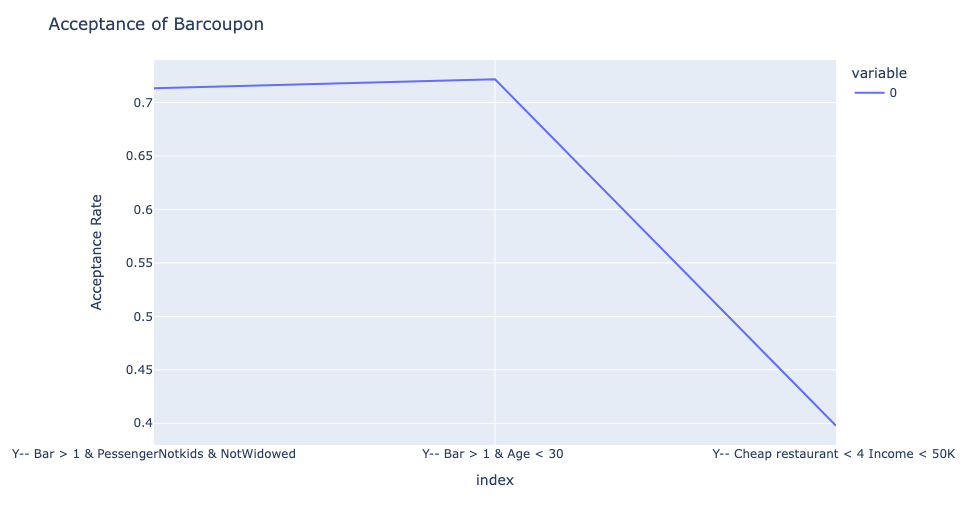

In [54]:
image_path = 'Images/plotly_6.png'
image = Image.open(image_path)
display.display(image)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the visualizations, 41% of the bar coupons were accepted by the people while 59% chose to reject.
1: Among 41%, people who visit a bar more than 3 times a month preffered to accept. The acceptance rate is 77%
2: There found no significant difference among people (who are younger than 25 years of age and visit a bar
   more than once) and (the people who are older than 25 and visit a bar more than once).
3: A clear distinction can be seen in acceptance between the people accompaning the kids and people travelling
   without the kids. The rate is significant low in the later option which is 0.33%
4: Income did impact the acceptance, people earning less than 50K opted out the coupons while the biengs
   less than the age of 30 accepted the coupons most.

Conclusion from the above observation is that people who are either younger than 30(visit a bar more than once
a month) or people travelling without the kids(visit a bar more than once a month) accepted the coupons most.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [55]:
# plot a visualization to look at the most offered coupons.
summation = None
summation = df['Coupon'].value_counts()
px.bar(summation)
# Findings:
# Most offered Coupnos are coffeHouse
# Lets investigate the acceptance rate of CoffeeHouse Coupons

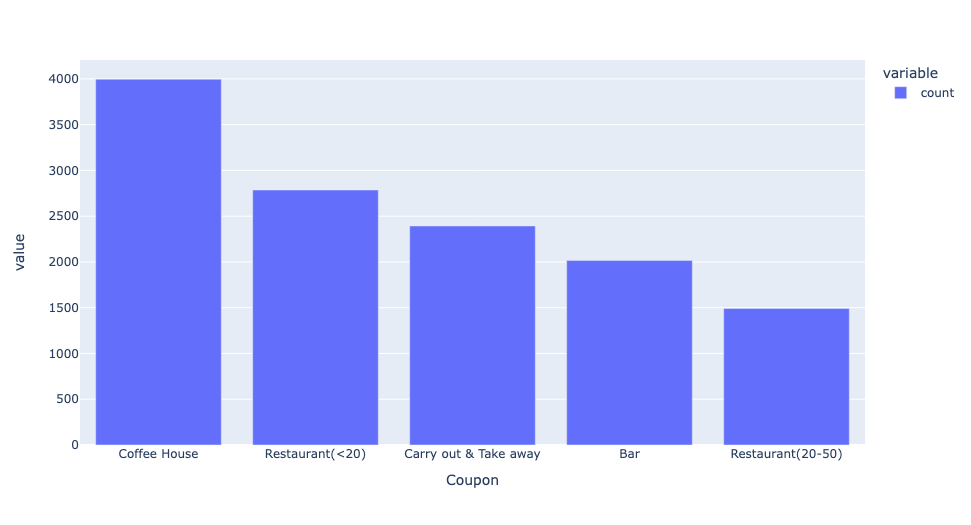

In [56]:
image_path = 'Images/plotly_7.png'
image = Image.open(image_path)
display.display(image)

In [57]:
# I chose to work with Coffee Coupon whcih is the most offered coupon.
df_coffee = df.query('Coupon == "Coffee House"')

In [58]:
plt.figure(figsize=(8,8))
fig = px.bar(df_coffee, x='Income', y='Y')
fig.update_layout(
    title='Acceptance of Coffee coupon Vs Income',  
    xaxis=dict(title='Income'),  
    yaxis=dict(title='Count of Accepted Coupon')       
)
fig.show()
#Findings:
# People with Income 43.75K accepted the coffee coupons most.
# Lowest acceptance wer eobserved with the salary aroung 80k
# people with the saalry above 150K lies in the middle.

<Figure size 800x800 with 0 Axes>

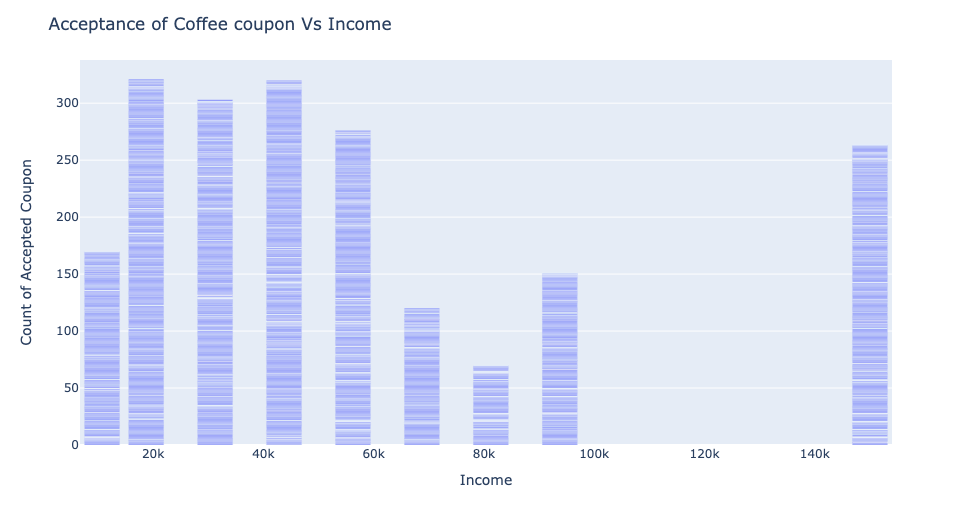

In [59]:
image_path = 'Images/plotly_8.png'
image = Image.open(image_path)
display.display(image)

In [60]:
#Comaprate the number of accepted and rejected coupon when the Income is less than 100,000
# Plot is number against the age to visualizde the numbers.
df_new = None

df_new= df_coffee.query('(Income < 100000)')[['Age','Y']].value_counts()
df_new = df_new.reset_index()

fig = px.bar(df_new, x='Age', y='count', color='Y')
fig.update_layout(
    title='Coffee coupon Vs Age',  
    xaxis=dict(title='Age'),  
    yaxis=dict(title='Count of Accepted and Rejected Coupons')       
)
fig.show()
#Findings: The proportion of acceptance is high in age under 21, rest categories shows almost 50% percent of acceptance

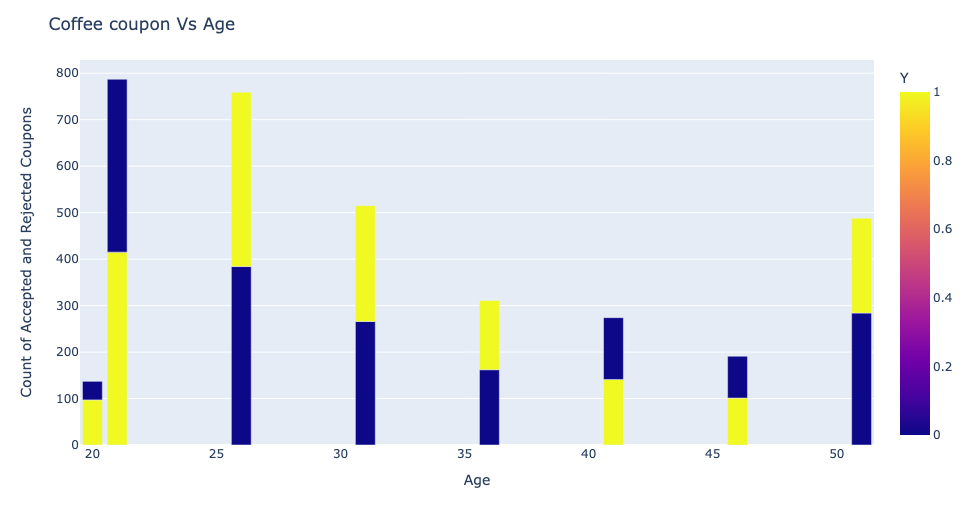

In [61]:
image_path = 'Images/plotly_9.png'
image = Image.open(image_path)
display.display(image)

<Axes: ylabel='count'>

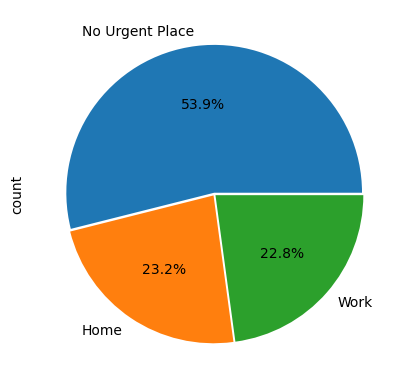

In [62]:
# Find the percentage of destination of the people that were offered coupons.
explode = (0.01,0.01,0.01)
df_coffee['Destination'].value_counts().plot(kind='pie', autopct='%0.1f%%', explode=explode,)
#Findings: Highest Percentage of the people that were offered coffee coupons were heading to no urgent place.

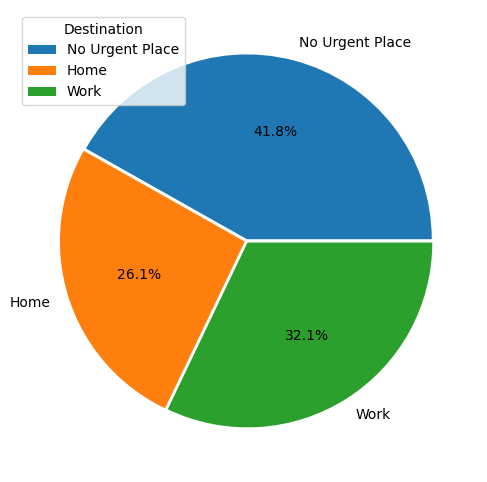

In [63]:
# Acceptance rate among all destination categories
a = None
b = None
c = None
d = None
e = None

a = df_coffee.query('(Destination == "No Urgent Place") & (Y == 1)')[['Y']].count()/ df_coffee.query('(Destination == "No Urgent Place")')[['Y']].count()
b = df_coffee.query('(Destination == "Home") & (Y == 1)')[['Y']].count()/ df_coffee.query('(Destination == "Home")')[['Y']].count()
c = df_coffee.query('(Destination == "Work") & (Y == 1)')[['Y']].count()/ df_coffee.query('(Destination == "Work")')[['Y']].count()
d = pd.concat([a,b])
e = pd.concat([d, c])

plt.figure(figsize=(6,6))
explode = (0.01,0.01,0.01)
classes = ['No Urgent Place', 'Home', 'Work']
e.plot(kind='pie',  autopct='%0.1f%%', explode=explode, labels=classes)
plt.legend(title='Destination', loc='upper left')
#Findings: The acceptance rate is high among people travelling to non urgent places

<Axes: title={'center': 'Acceptance of Coffee Coupons Vs Weather and Destination'}, xlabel='Weather,Y,Destination'>

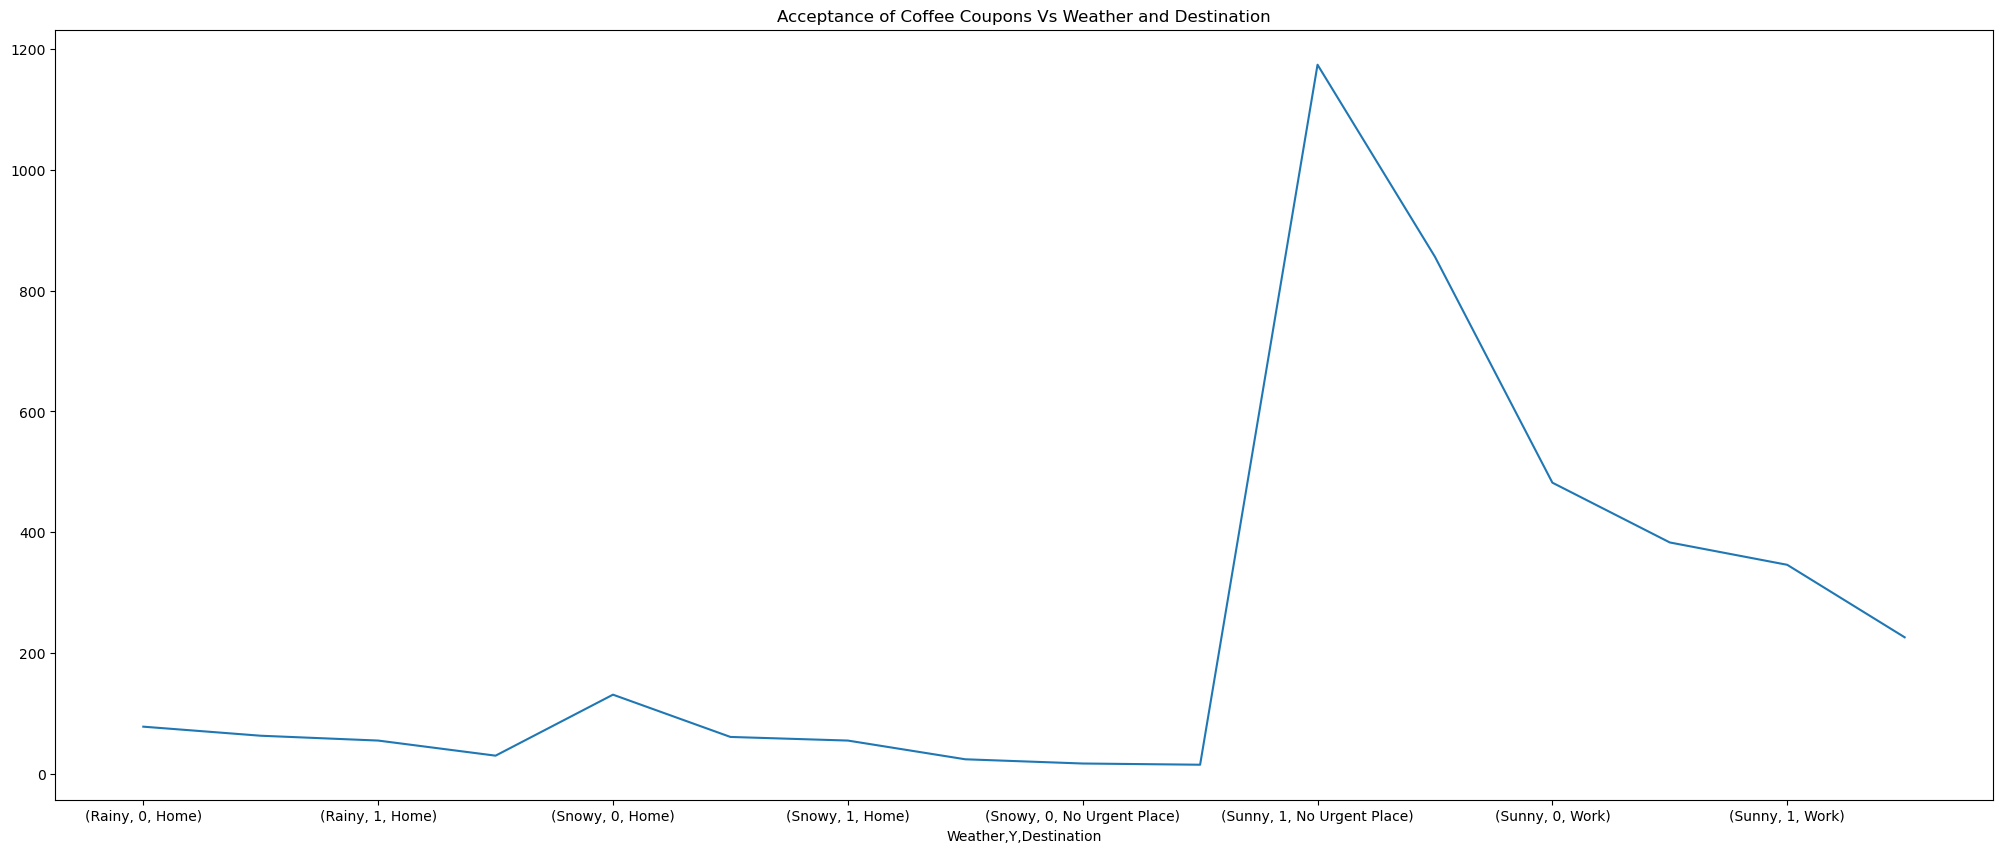

In [64]:
# Lets explore the effect of weather
df_new = None

df_new = df_coffee.groupby('Weather')[['Y', 'Destination']].value_counts()

plt.figure(figsize=(25,10))
df_new.plot(kind='line', title="Acceptance of Coffee Coupons Vs Weather and Destination")
# The acceptance rate is highest when the weather is sunny and people are travelling to non urgent place.
# The rejection rate is highest if the people are travelling for work irrespect of suuny day.

<Axes: xlabel='Weather,Y,Destination'>

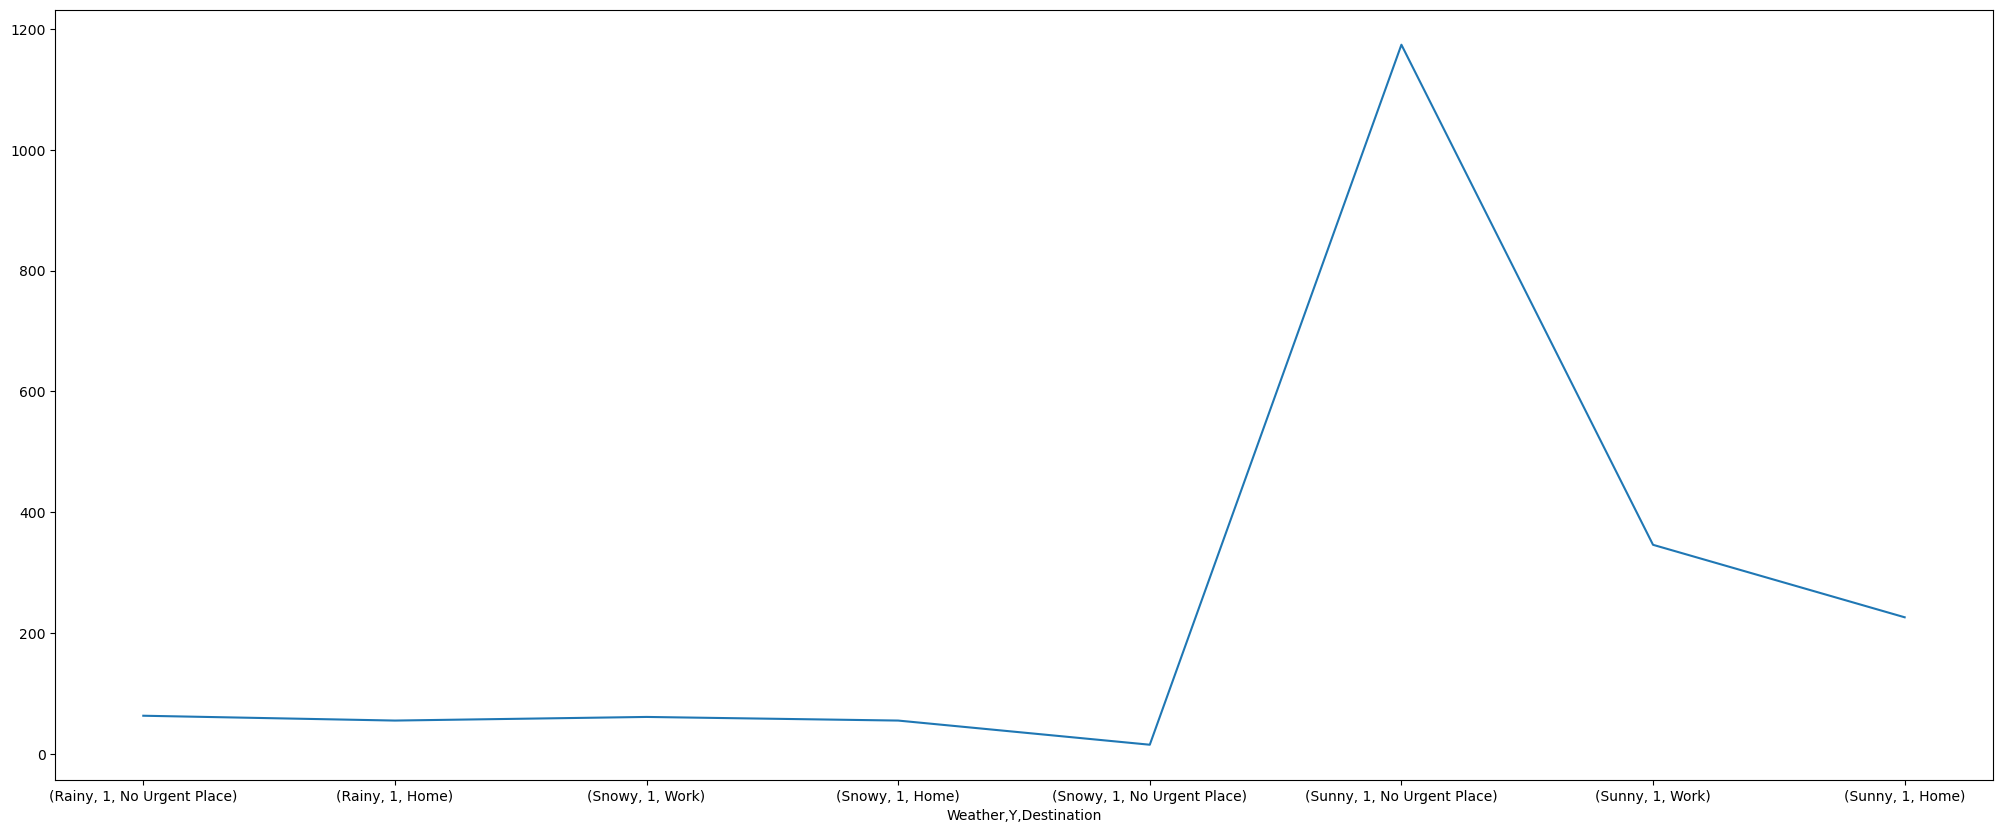

In [65]:
# The above plot but only for the people who accepted the offer of coffe Coupon to observe the acceptance count only.
df_new = None

df_new = df_coffee.query('Y == 1').groupby('Weather')[['Y', 'Destination']].value_counts()

plt.figure(figsize=(25,10))
df_new.plot(kind='line')
#The Count is highest when the people are travelling to non urgent places and the weahther is sunny.
# The count dropped even people are travelling to non urgent places but it is rainy or snowy outside.


In [66]:
# The above visualization in ploty now.
df_new = None

df_new = df_coffee.query('Y == 1').groupby('Weather')[['Y', 'Destination']].value_counts()
df_new = df_new.reset_index()

fig = px.bar(df_new, x='Weather', y='count', color='Destination')
fig.update_layout(title='CoffeeCoupons Vs Weather and Destination')
fig.show()
# Acceptance of coupons depending on weather vs Destination.
#Findings: During the rainy day, rate dropped significantly, even for the non urgent destination.

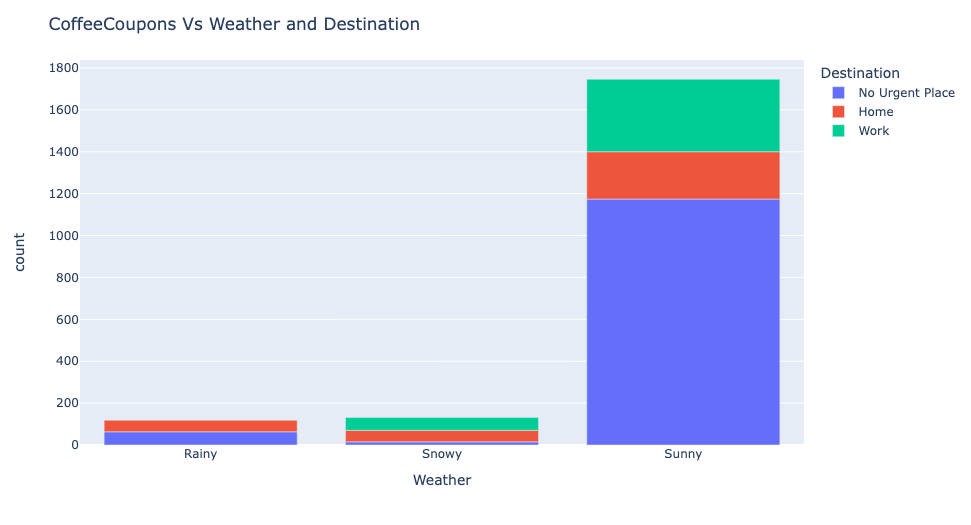

In [67]:
image_path = 'Images/plotly_10.png'
image = Image.open(image_path)
display.display(image)

In [68]:
# Lets Compare the Acceptance Count vs Frquency of visitng the coffe house per month.

a = None
b = None
c = None
d = None
e = None
df_new = None

a = df_coffee.query('Coffeehouse == 0')[['Coffeehouse','Y']].value_counts()
b = df_coffee.query('(Coffeehouse > 0) & (Coffeehouse < 8)')[['Coffeehouse','Y']].value_counts()
c = df_coffee.query('(Coffeehouse > 8)')[['Coffeehouse','Y']].value_counts()
d = pd.concat([a, b])
e = pd.concat([d, c])
e = e.reset_index()

px.bar(e, x='Coffeehouse', y='count', color='Y')
#Findings: People use to visit most often coffee house per month, have the highest count of acceptance.
# While the people dost not go ot coffee house, the big proportion of those peole rejected the coupon.

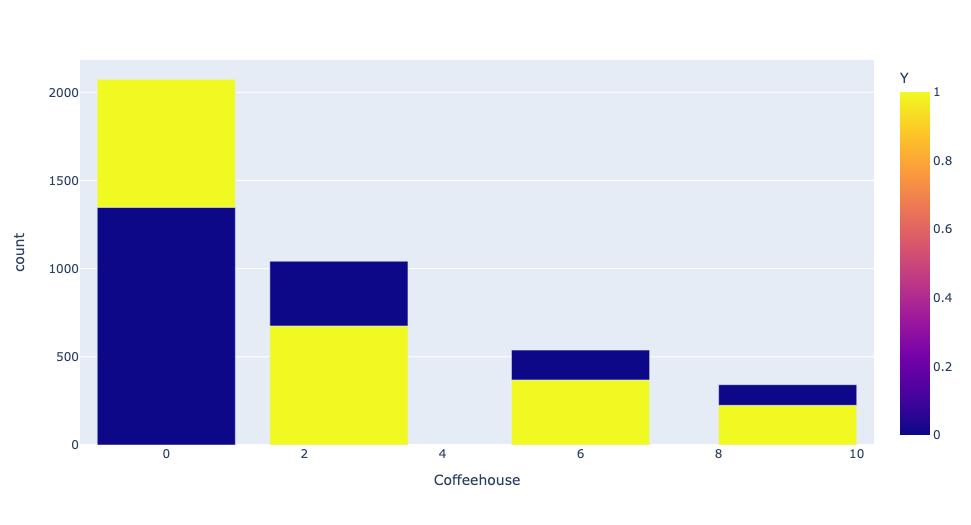

In [69]:
image_path = 'Images/plotly_11.png'
image = Image.open(image_path)
display.display(image)

In [70]:
# Now plot the acceptance rate with respect to Passengers.
df_new = None
a = None
a = df_coffee.query(' (Age < 25) & ((Occupation == "Student") | (Occupation == "Unemployed") )')[['Y','Passenger']].value_counts(normalize=True)
a = a.reset_index()
px.bar(a, y='proportion', x='Passenger', color='Y')
# The acceptance rate is highest when people are travelling alone. it is promising even when they 
# are travelling with friends. People travelling with parteners and kids seems least interested
# in the offer.

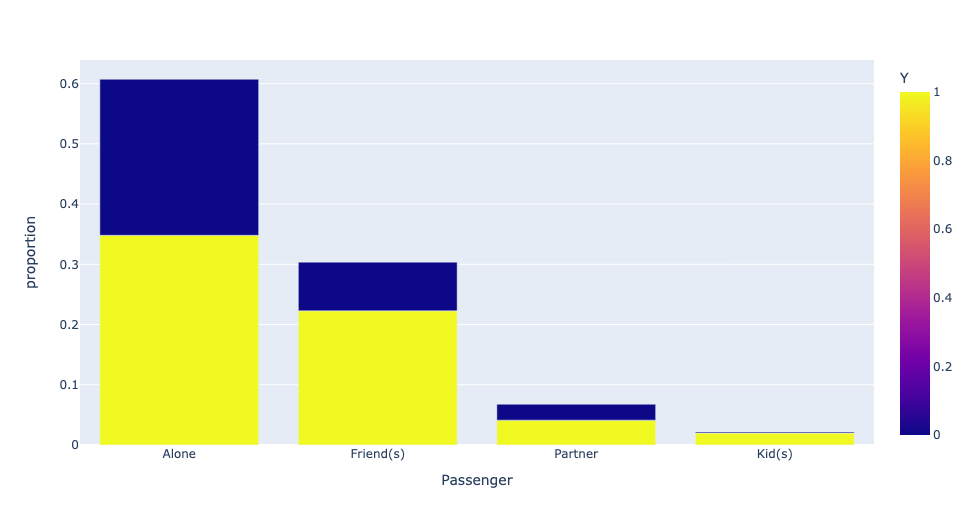

In [71]:
image_path = 'Images/plotly_12.png'
image = Image.open(image_path)
display.display(image)

Observations about the CoffeCoupon: 1: The most offered coupon is CoffeeHouse. 2: People under age 21 has the highest rate of acceptance. 3: People travelling to non urgent places preffered to accept as compare to people travelling to work or home. 3: Weather is a true contributor as the rate of acceptance declined significanlty during the rainy day. 4: Income wise, there is not a noticeable differnce. Almost the same rate is observed in the range of 18K to 60K. 5: Profession wise, peole interested to accept the coupons are students and unemployed, although the acceptance rate is highest in health care professionals. 6: Upon observing the age of students, health care profesionals, and unempoyed people, peoples aged 21 and below are the most attracted people to utilize the coupons. Conclusion: To increase the acceptance rate of the coffee coupons, the targeted community should be below age of 22. Coupons should be offered on a sunny day. Another vital element that should be considered is the profession. As the age suggest that most of the community will be either surdents or unemployed.


In [72]:
# Independent Observation to visualizse the acceptance rate in all categories vs Passengers.

a = None
df_new = None
df_new = df.query('Y == 1').groupby('Passenger')[['Passenger', 'Coupon']].value_counts(normalize=True)
df_new = df_new.reset_index()
fig = px.bar(df_new, y='proportion', x='Coupon', color='Passenger')
fig.update_layout(title="Count of Acceptance in all categories")
fig.show()
# Findings: the highest acceptance rate vs passenger
# Bar , when passenger is with partner
# Carry or Takea, when person is alone
# Restaurant less than 20, when with kids
# Restuarant 20 to 50,when with aprtner
# CoffeeeHouse, When with Friends


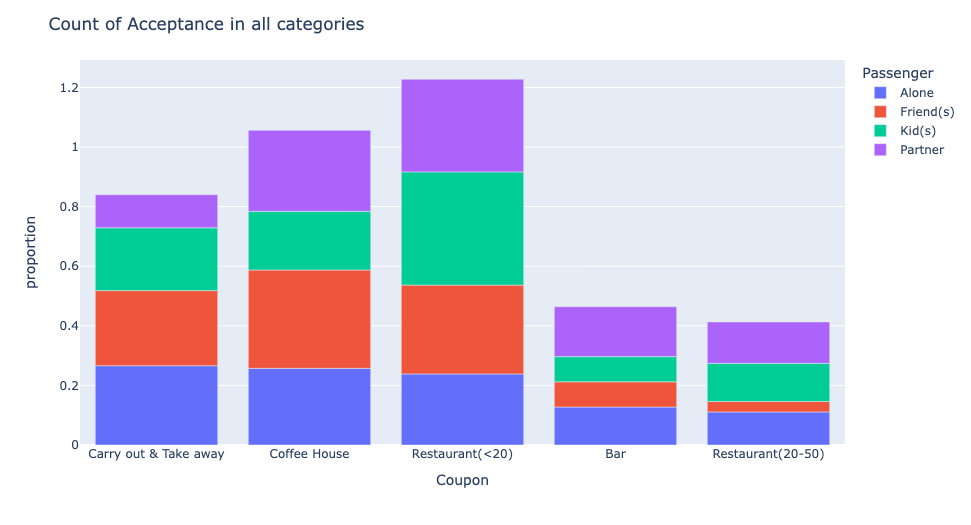

In [73]:
image_path = 'Images/plotly_13.png'
image = Image.open(image_path)
display.display(image)